<a href="https://colab.research.google.com/github/SujalChauhan04/Generative-AI-labfile/blob/main/Experiment-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Dataset
import tensorflow
from tensorflow.keras.datasets import mnist
 # MNIST dataset is included in Keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


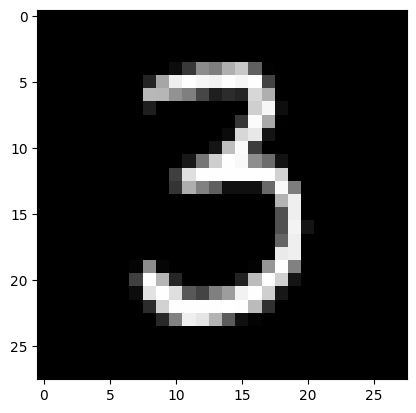

In [ ]:

# Visualize any random image
import matplotlib.pyplot as plt
i=50;
plt.imshow(X_train[i], cmap='gray');

In [ ]:
# reshape 28 x 28 matrices into 784-length vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
# normalize each value for each pixel for the entire vector for each input
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize by dividing by largest pixel value
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Input


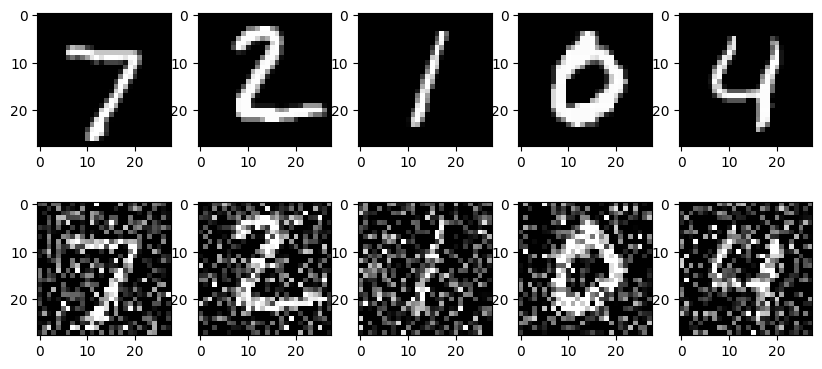

In [ ]:
# Add noise to input
import numpy as np
noise_factor = 0.4
X_train_noisy = X_train + noise_factor * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size=X_test.shape)
X_train_noisy= np.clip(X_train_noisy, 0.0, 1.0)
X_test_noisy = np.clip(X_test_noisy , 0.0, 1.0)
n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
 # plot original image
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(X_test[i].reshape(28, 28))
 plt.gray()
 if i == n/2:ax.set_title('Original Images')
 # plot noisy image
 ax = plt.subplot(2, n, i + 1 + n)
 plt.imshow(X_test_noisy[i].reshape(28, 28))
 plt.gray()
 if i == n/2:ax.set_title('Noisy Input')

In [ ]:
X_train[i].shape
input_size = 784
hidden_size = 128
code_size = 32
# Complete the code
dae = Sequential()
# Input layer
dae.add(Dense(784, activation='relu', input_dim=input_size))
# input_layer = Input(shape=(input_size,784))
# Hidden layer 1 in Encoder with 128 units, relu activation
dae.add(Dense(128, activation='relu'))
# Hidden layer 2 (Code ) in Encoder with 32 units, relu activation
dae.add(Dense(32, activation='relu'))
# Hidden layer 1 in Decoder with 128 units, relu activation
dae.add(Dense(128, activation='relu'))
# Hidden layer 2 in Encoder with 784 units, sigmoid activation
dae.add(Dense(784, activation='sigmoid'))
# Compile the model, adam optimizer MeanSquaredError loss function
dae.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder = Model(input_layer, decoder_layer)


In [ ]:
# Display model Summary
dae.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 784)               101136    
                                                                 
Total params: 825408 (3.15 MB)
Trainable params: 825408 (3.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Reconstruct Images from Noisy X_test images
dae.fit(X_train_noisy, X_train, validation_data=(X_test_noisy, X_test), epochs=5)
X_test_noisy_recons = dae.predict(X_test_noisy)

Epoch 1/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0157 - val_loss: 0.0162
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0150 - val_loss: 0.0154
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0144 - val_loss: 0.0150
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0139 - val_loss: 0.0152
Epoch 5/5
313/313 [==============================] - 2s 5ms/step


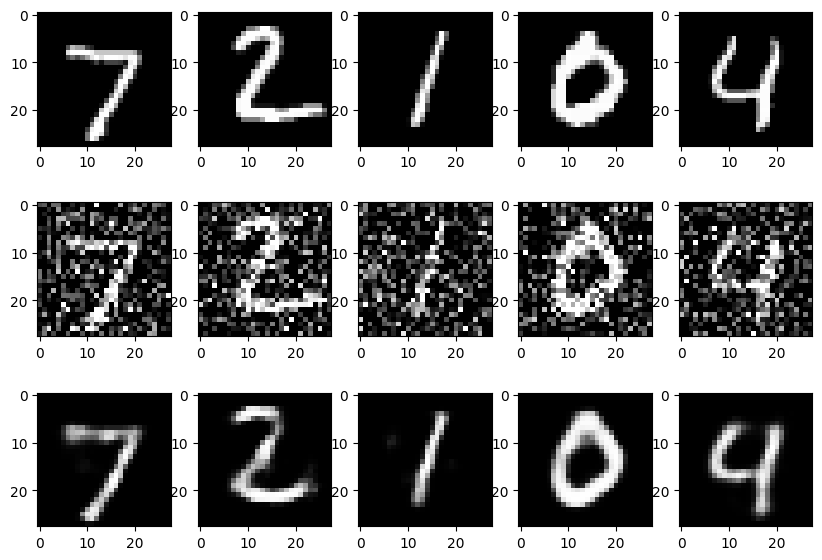

In [ ]:
n = 5
plt.figure(figsize=(10, 7))
for i in range(n):
 # plot original image
 ax = plt.subplot(3, n, i + 1)
 plt.imshow(X_test[i].reshape(28, 28))
 plt.gray()
 if i == n/2: ax.set_title('Original Images')
 # plot noisy image
 ax = plt.subplot(3, n, i + 1 + n)
 plt.imshow(X_test_noisy[i].reshape(28, 28))
 plt.gray()
 if i == n/2: ax.set_title('Noisy Input')
 # plot noisy image
 ax = plt.subplot(3, n, i + 1 + 2*n)
 plt.imshow(X_test_noisy_recons[i].reshape(28, 28))
 plt.gray()
 if i == n/2:ax.set_title('Autoencoder Output')